# Implementation of OU Model Mudchanatongsuk

This notebook demonstrates the usage of the `ou_model_mudchanatongsuk` module.

This module contains implementation of the following paper 

- [Optimal pairs trading: A stochastic control approach. (2008)](http://folk.ntnu.no/skoge/prost/proceedings/acc08/data/papers/0479.pdf) by Mudchanatongsuk, S., Primbs, J.A. and Wong, W.


## Introduction


In the paper corresponding to this module, the authors implement a stochastic control-based approach to the problem of pairs trading.
The paper models the log-relationship between a pair of stock prices as an Ornstein-Uhlenbeck process
and use this to formulate a portfolio optimization based stochastic control problem.
This problem is constructed in such a way that one may either
trade based on the spread (by buying and selling equal amounts of the stocks in the pair) or
place money in a risk-free asset. Then the optimal solution to this control problem
is obtained in closed form via the corresponding Hamilton-Jacobi-Bellman equation under a power utility on terminal wealth.


## Modelling


Let $A(t)$ and $B(t)$ denote respectively the prices of the
pair of stocks $A$ and $B$ at time $t$. The authors assume that stock $B$
follows a geometric Brownian motion,

$$
    d B(t)=\mu B(t) d t+\sigma B(t) d Z(t)
$$

where $\mu$ is the drift, $\sigma$ is the volatility, and $Z(t)$ is a standard
Brownian motion.

Let $X(t)$ denote the spread of the two stocks at time $t$,
defined as

$$
    X(t) = \ln(A(t)) − \ln(B(t))
$$

The authors assume that the spread follows an Ornstein-Uhlenbeck process

$$
    d X(t)=k(\theta-X(t)) d t+\eta d W(t)
$$

where $k$ is the rate of reversion, $\eta$ is the standard deviation and
$\theta$ is the long-term equilibrium level to which the spread reverts.

$\rho$ denotes the instantaneous correlation coefficient between $Z(t)$ and $W(t)$.

Let $V(t)$ be the value of a self-financing pairs-trading portfolio and
let $h(t)$ and $-h(t)$ denote respectively the
portfolio weights for stocks $A$ and $B$ at time $t$.


The wealth dynamics of the portfolio value is given by,

$$
    d V(t)= V(t)\left\{\left[h(t)\left(k(\theta-X(t))+\frac{1}{2} \eta^{2}+\rho \sigma \eta\right)+
    r\right] d t+\eta d W(t)\right\}
$$


Given below is the formulation of the portfolio optimization pair-trading problem
as a stochastic optimal control problem. The authors assume that an investor’s preference
can be represented by the utility function $U(x) = \frac{1}{\gamma} x^\gamma$
with $x ≥ 0$ and $\gamma < 1$. In this formulation, our objective is to maximize expected utility at
the final time $T$. Thus, the authors seek to solve


$$
    \begin{aligned}
    \sup _{h(t)} \quad & E\left[\frac{1}{\gamma}(V(T))^{\gamma}\right] \\[0.8em]
    \text { subject to: } \quad & V(0)=v_{0}, \quad X(0)=x_{0} \\[0.5em]
    d X(t)=& k(\theta-X(t)) d t+\eta d W(t) \\
    d V(t)=& V(t)((h(t)(k(\theta-X(t))+\frac{1}{2} \eta^{2}\\
    &+\rho \sigma \eta)+r) d t+\eta d W(t))
    \end{aligned}
$$

Finally, the optimal weights are given by,

$$
    h^{*}(t, x)=\frac{1}{1-\gamma}\left[\beta(t)+2 x \alpha(t)-\frac{k(x-\theta)}{\eta^{2}}+
    \frac{\rho \sigma}{\eta}+\frac{1}{2}\right]
$$


---

## How to use this submodule

This submodule contains two public methods. One for estimating the parameters of the model using training data,
and the second method is for calculating the final optimal portfolio weights using evaluation data.


### Imports and Loading the dataset

We use the $GLD$ and $GDX$ tickers daily close prices as our dataset. The training data comprises of data from years $2010$ to $2017$. The optimal weights are calculated on data from $2018$ to $2020$.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

from arbitragelab.stochastic_control_approach.ou_model_mudchanatongsuk import OUModelMudchanatongsuk

data1 =  yf.download("GLD GDX", start="2010-01-01", end="2017-12-31")
data2 =  yf.download("GLD GDX", start="2018-01-01", end="2020-08-15")

data_train_dataframe = data1["Adj Close"][["GLD", "GDX"]]
data_test_dataframe = data2["Adj Close"][["GLD", "GDX"]]

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


### Fitting the model


We input the training data to the fit method which calculates the spread
and the estimators of the parameters of the model.


***
Although the paper provides closed form solutions for parameter estimation,
    this module uses log-likelihood maximization to estimate the parameters as we found the closed form solutions provided to be unstable.

***

In [42]:
from arbitragelab.stochastic_control_approach.ou_model_mudchanatongsuk import OUModelMudchanatongsuk

sc = OUModelMudchanatongsuk()

sc.fit(data_train_dataframe)

 To view the estimated model parameters from training data, we can use the `describe` function in the class object.

In [43]:
display(pd.DataFrame(sc.describe(), columns=['Values']))

,Values
Ticker of first stock,GLD
Ticker of second stock,GDX
long-term mean of spread,1.65495
rate of mean reversion of spread,0.316935
standard deviation of spread,0.294463
half-life of spread,2.18703
Drift of stock B,0.0388736
standard deviation of stock B,0.400711


### Generating the Optimal Portfolio Weights


In this step we input the out-of-sample test data to calculate the optimal portfolio weights using the fitted model and specify the utility function parameter $\gamma$.

***
    As noted in the paper, please make sure the value of gamma is less than 1.
***

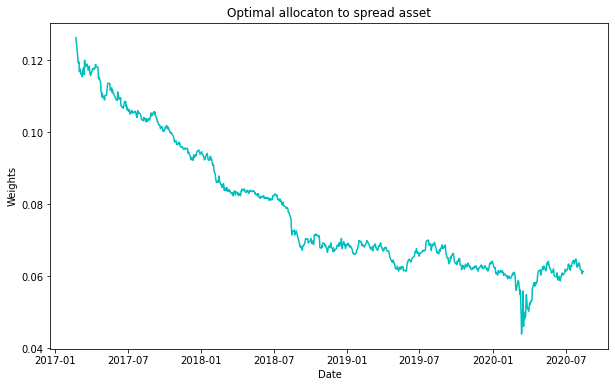

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(data_test_dataframe.index, sc.optimal_portfolio_weights(data_test_dataframe), 'c-')
plt.title("Optimal allocaton to spread asset")
plt.ylabel("Weights")
plt.xlabel("Date")
plt.show()

Shown below is a plot of the pricing data used to calculate the optimal portfolio weights.

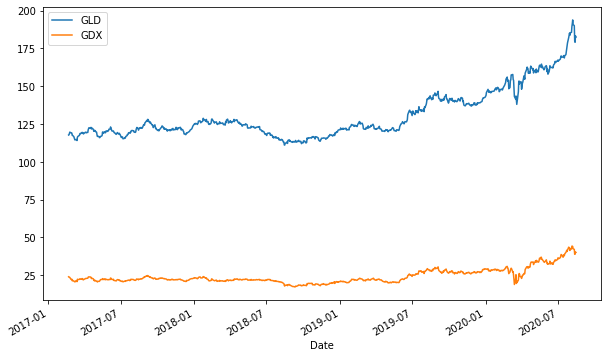

In [49]:
data_test_dataframe.plot(figsize=(10, 6));

---

## Conclusion



## References

* [Optimal pairs trading: A stochastic control approach. (2008)](http://folk.ntnu.no/skoge/prost/proceedings/acc08/data/papers/0479.pdf) by Mudchanatongsuk, S., Primbs, J.A. and Wong, W.